In [1]:
import os 
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
# import scanpy as sc
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager # to solve: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.

import scanpy as sc

In [3]:
import sys
sys.path.append('../../')

import utils

# Config

In [18]:
# set global rc parameters
utils.config_rc(dpi=300)
# mpl.rcParams
wk_root = os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir))

In [5]:
data_root = utils.get_path('baseline_wk_path', json_path=os.path.join(wk_root, '_data.json'))

In [6]:
# cols = utils.react_cols_10[:5]
# cols.extend(utils.react_cols_10[7:9])
# cols.append('#666666')
# cols[0] = utils.norm_12[8]
# sns.color_palette(cols)


In [7]:
coll = ['#8dd3c7','#bebada','#fb8072','#80b1d3','#fdb462','#b3de69','#fccde5','#cccccc']
sns.color_palette(coll)

[(0.5529411764705883, 0.8274509803921568, 0.7803921568627451),
 (0.7450980392156863, 0.7294117647058823, 0.8549019607843137),
 (0.984313725490196, 0.5019607843137255, 0.4470588235294118),
 (0.5019607843137255, 0.6941176470588235, 0.8274509803921568),
 (0.9921568627450981, 0.7058823529411765, 0.3843137254901961),
 (0.7019607843137254, 0.8705882352941177, 0.4117647058823529),
 (0.9882352941176471, 0.803921568627451, 0.8980392156862745),
 (0.8, 0.8, 0.8)]

# Data

In [8]:
baseline_raw_st_root =  os.path.join(data_root,'data/DLPFC')
outPath =  os.path.join(data_root,'output/DLPFC')

In [9]:
sample_index = ["151507","151508","151509","151510","151669","151670","151671","151672","151674","151675","151676"]
algo_index = ["Leiden", 'Giotto', "stLearn", "SEDR", "SpaGCN", "BayesSpace", "SpaSEG"]

In [10]:
smaple_id = '151673'

In [11]:
# 
adata_path = os.path.join(baseline_raw_st_root,f"{smaple_id}.h5ad")
adata = sc.read_h5ad(adata_path)

/home/baiyong/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [13]:
adata.uns['spatial']

{'151673': {'images': {'hires': array([[[0.68235296, 0.69803923, 0.69411767],
           [0.68235296, 0.69411767, 0.6901961 ],
           [0.6784314 , 0.69803923, 0.6901961 ],
           ...,
           [0.6784314 , 0.6901961 , 0.6901961 ],
           [0.6745098 , 0.69411767, 0.6901961 ],
           [0.68235296, 0.69803923, 0.6901961 ]],
   
          [[0.68235296, 0.69411767, 0.6901961 ],
           [0.68235296, 0.69803923, 0.6862745 ],
           [0.68235296, 0.69411767, 0.6862745 ],
           ...,
           [0.6745098 , 0.6862745 , 0.6862745 ],
           [0.6784314 , 0.69411767, 0.6901961 ],
           [0.68235296, 0.69411767, 0.6901961 ]],
   
          [[0.6862745 , 0.69411767, 0.6862745 ],
           [0.68235296, 0.69803923, 0.69411767],
           [0.6784314 , 0.69411767, 0.6862745 ],
           ...,
           [0.6784314 , 0.69411767, 0.6901961 ],
           [0.6745098 , 0.6862745 , 0.68235296],
           [0.6784314 , 0.69411767, 0.69411767]],
   
          ...,
   
       

In [14]:
true_domains = ['Layer_1', 'Layer_2', 'Layer_3', 'Layer_4', 'Layer_5', 'Layer_6', 'WM', 'nan']
_palette = dict(zip(true_domains, coll))

# Plot 151673 Ground Truth

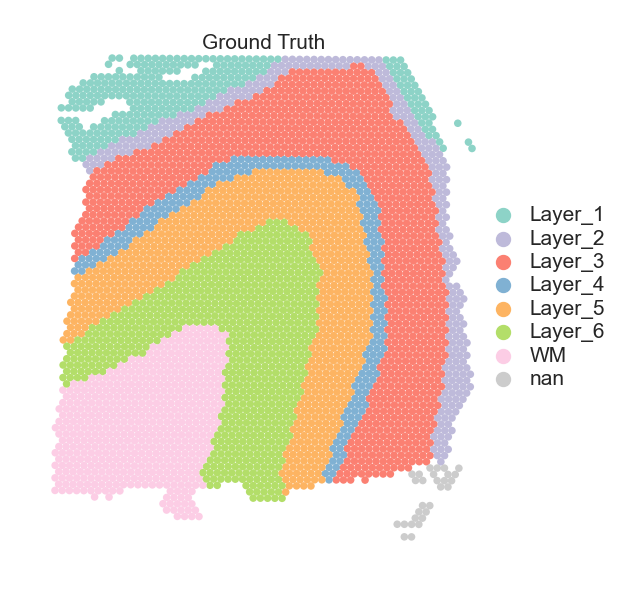

In [17]:
fig,ax = plt.subplots(figsize=(utils.centimeter*6, utils.centimeter*6))
sc.pl.spatial(adata, color='celltype', show=False, ax=ax, size=1.5, palette=_palette, frameon=False,img_key=None)
ax.legend(loc='center left', bbox_to_anchor=[0.95, 0.5], ncol=1, frameon=False, 
           markerscale=0.6, labelspacing=0.2,fontsize=5,
          handleheight= 0.8, handlelength=1.0)
ax.set_title('Ground Truth',pad=0, y=0.965)
plt.savefig(os.path.join(wk_root, "notebook/results/Baseline/baseline_151673_truth.pdf"), bbox_inches='tight', format='pdf', dpi=400)

# Plot Baseline 151673

In [18]:
layer_map = {"Leiden":{0:'Layer_6', 1:'WM', 2:'Layer_3', 3:'Layer_2', 4:'Layer_1', 5:'Layer_4', 6:'Layer_5'}, 
             'Giotto':{1:'Layer_1', 2:'Layer_3', 3:'Layer_2', 4:'Layer_5', 5:'WM', 6:'Layer_4',7:'Layer_6'}, 
             "stLearn":{0:'Layer_1', 1:'Layer_3', 2:'WM', 3:'Layer_5', 4:'Layer_2', 5:'Layer_6', 6:'Layer_4'}, 
             "SEDR":{0:'Layer_6', 1:'Layer_3', 2:'Layer_1', 3:'WM',}, 
             "SpaGCN":{0:'Layer_2', 1:'Layer_1', 2:'Layer_4', 3:'Layer_3', 4:'Layer_5', 5:'WM', 6:'Layer_6'}, 
             "BayesSpace":{1:'Layer_3', 2:'Layer_4', 3:'Layer_6', 4:'Layer_2', 5:'Layer_1', 6:'Layer_5', 7:'WM',}, 
             "SpaSEG":{0:'WM', 1:'Layer_6', 2:'Layer_2', 3:'Layer_3', 4:'Layer_5', 5:'nan',6:'Layer_1'}
            }
col_map = {}
for _algo in algo_index:
    _layer_map = layer_map[_algo]
    col_map[_algo] = {item:_palette[val] for (item, val) in _layer_map.items()} 

In [12]:
def _get_clusters(baseline_raw_st_root, outPath, sample_index):
    adata_l = []
    
    for sample in sample_index:
        adata_path = os.path.join(baseline_raw_st_root,f"{sample}.h5ad")
        adata = sc.read_h5ad(adata_path)
    
        leiden_meta = pd.read_csv(os.path.join(outPath,sample,"leiden", "metadata.tsv"), sep="\t")
        leiden_meta.index = adata.obs_names
        adata.obs['Leiden_clusters'] = leiden_meta["leiden_clusters"].astype("category")
        
        Giotto_meta = pd.read_csv(os.path.join(outPath,sample,"Giotto", "metadata.tsv"), sep="\t",index_col=0)
        adata.obs['Giotto_clusters'] = Giotto_meta["HMRF_cluster"].astype("category")
        
        stLearn_meta = pd.read_csv(os.path.join(outPath,sample,"stLearn", "metadata.tsv"), sep="\t")
        stLearn_meta.index = adata.obs_names
        adata.obs['stLearn_clusters'] = stLearn_meta["X_pca_kmeans"].astype("category")

        SEDR_meta = pd.read_csv(os.path.join(outPath,sample,"SEDR", "metadata.tsv"), sep="\t", index_col=0)
        adata.obs['SEDR_clusters'] = SEDR_meta["SEDR"].astype("category")
    
        SpaGCN_meta = pd.read_csv(os.path.join(outPath,sample,"SpaGCN", "metadata.tsv"), sep="\t",index_col=0)
        adata.obs['SpaGCN_clusters'] = SpaGCN_meta["refined_pred"].astype("category")

        BayesSpace_meta = pd.read_csv(os.path.join(outPath,sample,"BayesSpace", "metadata.tsv"), sep="\t",index_col=0) 
        adata.obs['BayesSpace_clusters'] = BayesSpace_meta["spatial.cluster"].astype("category")

        SpaSEG_meta = pd.read_csv(os.path.join(outPath,sample,"SpaSEG", "metadata.tsv"), sep="\t",index_col=0)
        adata.obs['SpaSEG_clusters'] = SpaSEG_meta["SpaSEG_clusters"].astype("category")
        
        adata_l.append(adata)
    return adata_l

In [13]:
adata_l = _get_clusters(baseline_raw_st_root, outPath, [smaple_id])

/home/baiyong/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [16]:
result_ari = pd.read_csv(os.path.join(wk_root, "notebook/results/Baseline/baseline_ari.csv"), index_col=0)
result_nmi = pd.read_csv(os.path.join(wk_root, "notebook/results/Baseline/baseline_nmi.csv"), index_col=0)
result_ari = result_ari.reset_index(names=['sample_id'])
result_ari['sample_id'] = result_ari['sample_id'].astype(str) 
result_nmi = result_nmi.reset_index(names=['sample_id'])
result_nmi['sample_id'] = result_nmi['sample_id'].astype(str) 

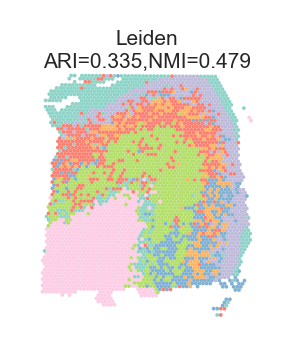

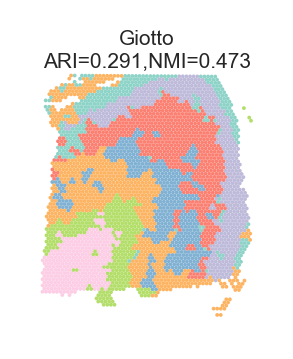

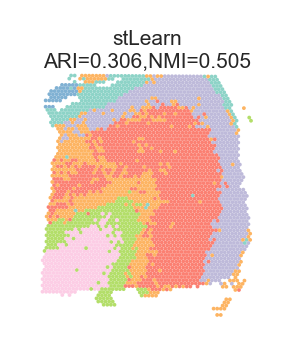

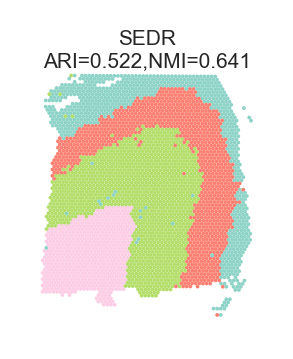

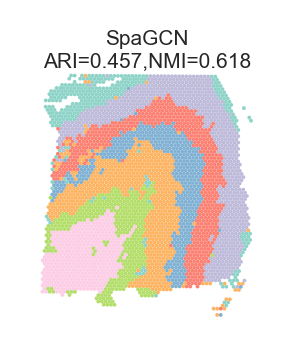

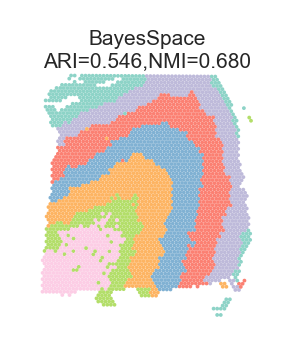

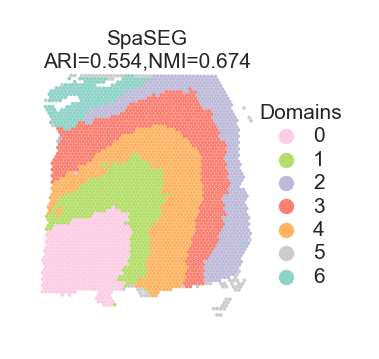

In [22]:
n_algo = len(algo_index)
for i,_algo in enumerate(algo_index):
    fig,ax = plt.subplots(figsize=(utils.centimeter*3, utils.centimeter*3))
    sc.pl.spatial(adata_l[0], color=f"{_algo}_clusters", show=False, palette=col_map[_algo], ax=ax, size=1.5, img_key=None, frameon=False)
    ax.set_title('{0}\nARI={1:.3f},NMI={2:.3f}'.format(
        _algo, 
        result_ari[_algo][result_ari['sample_id']==smaple_id].values[0],
        result_nmi[_algo][result_nmi['sample_id']==smaple_id].values[0]),pad=0, y=0.98)
    if i<n_algo-1:
        ax.get_legend().remove()
    else:
        leg = ax.legend(loc='center left', bbox_to_anchor=[0.9, 0.5], ncol=1, frameon=False, 
           markerscale=0.6, labelspacing=0.2, fontsize=5,
          handleheight= 0.8, handlelength=1,title='Domains')
        leg.get_title().set_fontsize('5')
    
    plt.savefig(os.path.join(wk_root, f"notebook/results/Baseline/baseline_151673_{_algo}.pdf"), bbox_inches='tight', format='pdf', dpi=400)


# Plot all samples

In [14]:
adata_ll = _get_clusters(baseline_raw_st_root, outPath, sample_index)

/home/baiyong/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/baiyong/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/baiyong/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/baiyong/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/baiyong/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, cal

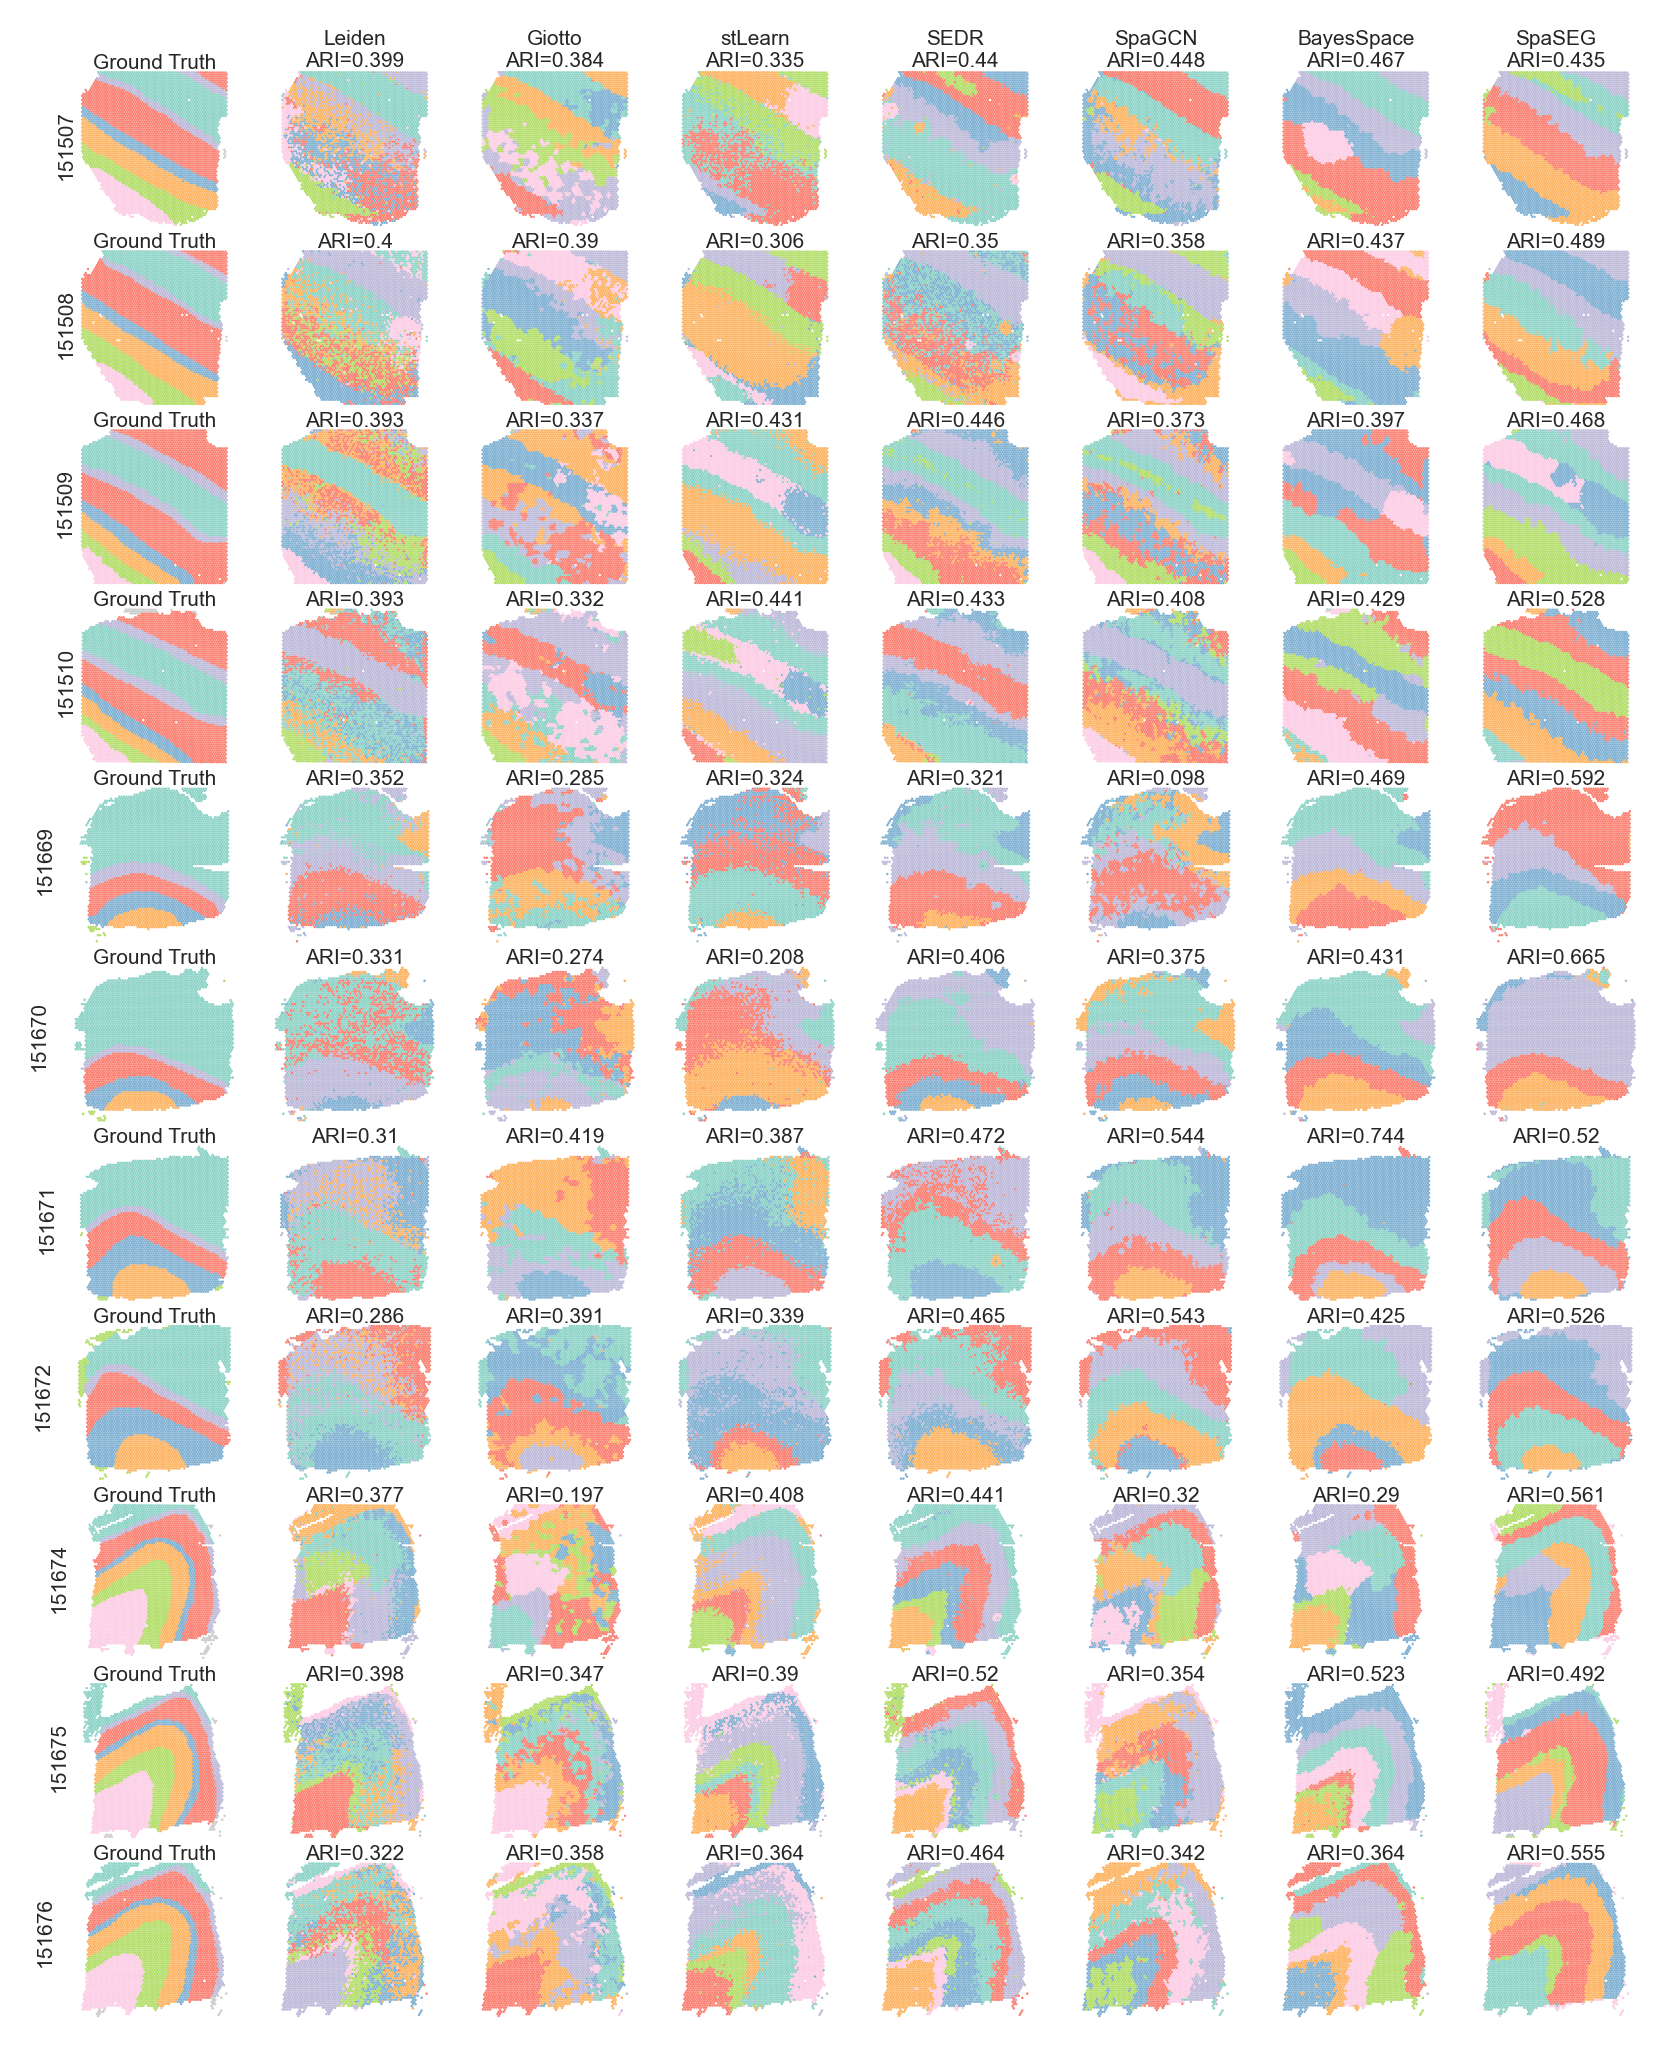

In [21]:
n_smaple = len(sample_index)
n_algo = len(algo_index)
fig,axs = plt.subplots(n_smaple, n_algo+1, 
                       figsize=(utils.centimeter*17.5, utils.centimeter*2*n_smaple),
                      gridspec_kw={'wspace': 0, 'hspace':0.05})
for i, _sample in enumerate(sample_index):
    _label = adata_ll[i].obs['celltype'].unique().sort_values()
    _palette = dict(zip(_label, coll[:len(_label)]))
    _ax = sc.pl.spatial(adata_ll[i], color='celltype', show=False, ax=axs[i,0], size=1.5, palette=_palette, frameon=False,img_key=None)
    axs[i,0].get_legend().remove()
    
    axs[i,0].set_title(f"Ground Truth",pad=0, y=0.97)    
    axs[i,0].text(600, adata_ll[i].obsm['spatial'][:,1].max()-3000, f'{_sample}',rotation='vertical')
    
    for j,_algo in enumerate(algo_index):
        _label = adata_ll[i].obs[f"{_algo}_clusters"].unique().sort_values()
        _palette = dict(zip(_label, coll[:len(_label)]))
        sc.pl.spatial(adata_ll[i], color=f"{_algo}_clusters", show=False, palette=_palette, ax=axs[i,j+1], size=1.5, img_key=None, frameon=False)
        axs[i,j+1].get_legend().remove()
#         axs[i,j+1].invert_yaxis()
        if i == 0:
            axs[i,j+1].set_title('{0}\nARI={1}'.format(_algo, result_ari[_algo][result_ari['sample_id']==_sample].values[0].round(3)),
                                pad=0, y=0.98)
        else:
            axs[i,j+1].set_title('ARI={0}'.format(result_ari[_algo][result_ari['sample_id']==_sample].values[0].round(3)),
                                 pad=0, y=0.97)
plt.savefig(os.path.join(wk_root, f"notebook/results/Baseline/baseline_All.pdf"), bbox_inches='tight', format='pdf', dpi=300)